In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [8]:
import tensorflow as tf
from tensorflow import keras

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
type(train_images)

numpy.ndarray

In [14]:
train_images[0][23][23]

194

In [15]:
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

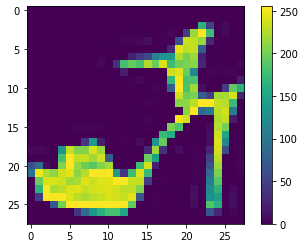

In [20]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images/255.0
test_images = test_images/255.0

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [28]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.fit(train_images,train_labels,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0961 - accuracy: 0.9635
Epoch 2/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0933 - accuracy: 0.9653
Epoch 3/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0934 - accuracy: 0.9649
Epoch 4/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0904 - accuracy: 0.9656


In [38]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=1)
print("Test accuracy : ",test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.8851
Test accuracy :  0.8851000070571899


In [41]:
predictions = model.predict(test_images)

In [42]:
type(predictions) # an array of 10 elements for each test image

numpy.ndarray

In [46]:
predictions[1]

array([4.2712869e-04, 1.4180508e-27, 9.9956948e-01, 6.1282552e-27,
       2.5375314e-06, 5.3716956e-18, 8.7912366e-07, 0.0000000e+00,
       1.7187292e-21, 1.3712951e-35], dtype=float32)

In [47]:
np.argmax(predictions[1])

2

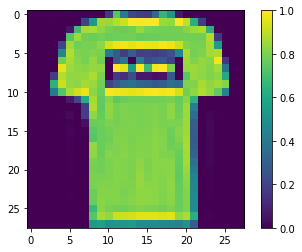

In [48]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
test_labels[1]

2

Pick a number: 65
The image is a:  Trouser


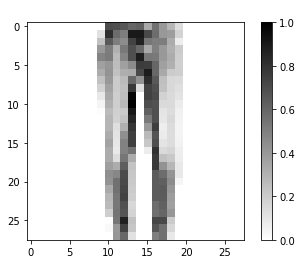

In [53]:
COLOR = 'white'
plt.rcParams['text.color']=COLOR
plt.rcParams['axes.labelcolor']=COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  # np.array which has 10 diff values/ probability of image belonging to each class
  predicted_class = class_names[np.argmax(prediction)]
  # highest value of prediction array converted into class_name value
  print("The image is a: ", predicted_class)
  show_image(image, class_names[correct_label], predicted_class)

def show_image(image,label,guess):
  plt.figure()
  plt.imshow(image,cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


# for user input to select image number from test_images .
def get_number(): 
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number() # get image number
image = test_images[num] # search that image in test_images
label = test_labels[num] # search for the label in test_labels
predict(model, image, label) #predict

